In [256]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

## 1. Имитация рулетки

In [2]:
matches = {'red': [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3],
          'black': [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26],
          'green': [0]}
stats = {}
num = 100000

for i in range(num):
    val = np.random.randint(0, 36)
    for k, v in matches.items():
        if val in v:
            stats.setdefault(k, 0)
            stats[k] += 1

## 2.1 Сложение вероятностей

{'red': 47277, 'black': 49935, 'green': 2788}
Вероятность зеленого:0.02788
Вероятность черного:0.49935
Вероятность красного:0.47277
Сумма вероятностей:1.0


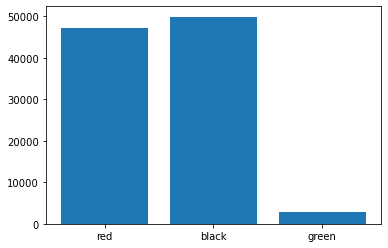

In [3]:
plt.bar(stats.keys(), stats.values())
print(stats)
prob = [stats["green"] / num, stats["black"] / num, stats["red"] / num]
print(f'Вероятность зеленого:{prob[0]}')
print(f'Вероятность черного:{prob[1]}')
print(f'Вероятность красного:{prob[2]}')
print(f'Сумма вероятностей:{sum(prob)}')

## 2.2 Распределение сумм

(array([1., 2., 1., 3., 0., 1., 1., 0., 0., 1.]),
 array([3.61317731, 3.84588831, 4.07859931, 4.3113103 , 4.5440213 ,
        4.7767323 , 5.00944329, 5.24215429, 5.47486529, 5.70757628,
        5.94028728]),
 <BarContainer object of 10 artists>)

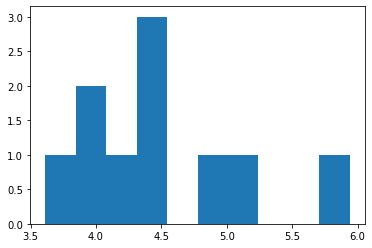

In [60]:
summ = []
for _ in range(10):
    summ.append(sum(np.random.rand(10)))
plt.hist(summ)

## 3. Метод Монте Карло

In [115]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d

for i in range(n):
    k += 1 if x[i] == 2 else 0

print(k, n, k/n)

3804 10000 0.3804


In [81]:
def C(k, n):
    return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))

In [114]:
# Расчет по формуле Бернулли

p = 1./2.
q = 1./2.
k, n = 2, 4
prob = C(k, n) * (p**k) * q**(n-k)
print(prob)

0.375


Вторая попытка

In [255]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)

x = a + b + c + d + e + f

for i in range(n):
    k += 1 if x[i] == 3 else 0

print(k, n, k/n)

3184 10000 0.3184


In [249]:
# Расчет по формуле Бернулли

p = 1./2.
q = 1./2.
k, n = 3, 6
prob = C(k, n) * (p**k) * q**(n-k)
print(prob)

0.3125


# 4. Возможные варианты перестановок

In [263]:
for val in itertools.product('01', repeat=4):
    print(''.join(val))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [271]:
for val in itertools.permutations('1a2b3c', 2):
    print(''.join(val))

1a
12
1b
13
1c
a1
a2
ab
a3
ac
21
2a
2b
23
2c
b1
ba
b2
b3
bc
31
3a
32
3b
3c
c1
ca
c2
cb
c3


In [272]:
for val in itertools.combinations('1a2b3c', 2):
    print(''.join(val))

1a
12
1b
13
1c
a2
ab
a3
ac
2b
23
2c
b3
bc
3c


# 5. Коэффициент корреляции

0.6883104795975886 0.15130940815353341
0.6883104795975901 0.15130940815353264


<ipython-input-297-5fdb3cda4eb5>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a1, b1 = np.linalg.lstsq(A, y)[0]


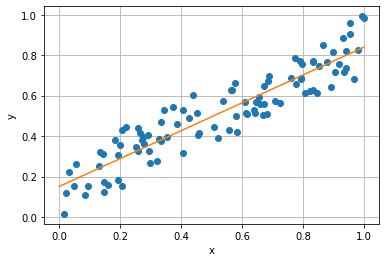

0.9232145269310567
[[1.         0.92321453]
 [0.92321453 1.        ]]


In [297]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b])
plt.show()

# custom correlation coef
corr = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))
print(corr)
print(np.corrcoef(x, y))